In [10]:
from pycaret.time_series import *

In [11]:
import pandas as pd
df = pd.read_csv("../data/seattle_house_price/clean_seattle_price_ts_mon.csv")
df = df[df['ZipCode'] == 98117]


In [12]:
df = df.transpose()
df

,80
ZipCode,98117.0
1982-01,60000.0
1982-02,59990.0
1982-03,71250.0
1982-04,93000.0
...,...
2021-11,945000.0
2021-12,942500.0
2022-01,903000.0
2022-02,1055000.0


In [16]:
df = df.iloc[1:, :]
df.index = pd.DatetimeIndex(df.index)
df.index.freq = 'MS'
df.index

DatetimeIndex(['1982-03-01', '1982-04-01', '1982-05-01', '1982-06-01',
               '1982-07-01', '1982-08-01', '1982-09-01', '1982-10-01',
               '1982-11-01', '1982-12-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', length=481, freq='MS')

In [22]:
recent_20yrs = df[df.index >= '2002-06-01']
recent_20yrs.head()

,80
2002-06-01,306000.0
2002-07-01,320000.0
2002-08-01,307250.0
2002-09-01,305750.0
2002-10-01,289500.0


In [23]:
s = setup(recent_20yrs, fh = 6, fold = 5, session_id= 123)


,Description,Value
0,session_id,123
1,Target,80
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(238, 1)"
5,Train data shape,"(232, 1)"
6,Test data shape,"(6, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,5
9,Enforce Prediction Interval,False


In [24]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
ets,ETS,36675.4412,45926.7387,0.0429,0.0431,0.7134,0.7105,-0.8009,0.0640
theta,Theta Forecaster,38472.0238,45727.8060,0.0446,0.0452,0.7481,0.7071,-0.7499,0.0320
naive,Naive Forecaster,39218.3333,46624.5254,0.0459,0.0466,0.7644,0.7222,-0.3699,0.6440
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,40046.4567,47696.3891,0.0468,0.0468,0.7777,0.7372,-1.2808,0.0340
exp_smooth,Exponential Smoothing,41285.3446,48553.3719,0.0480,0.0482,0.8017,0.7503,-1.1904,0.0900
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,41350.3049,49215.2790,0.0477,0.0483,0.8027,0.7606,-1.1273,0.0240
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,41350.3049,49215.2790,0.0477,0.0483,0.8027,0.7606,-1.1273,0.0240
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,41350.3049,49215.2790,0.0477,0.0483,0.8027,0.7606,-1.1273,0.0240
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,41350.3049,49215.2790,0.0477,0.0483,0.8027,0.7606,-1.1273,0.0240
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,41325.8492,49170.9115,0.0477,0.0483,0.8023,0.7599,-1.1263,0.0300


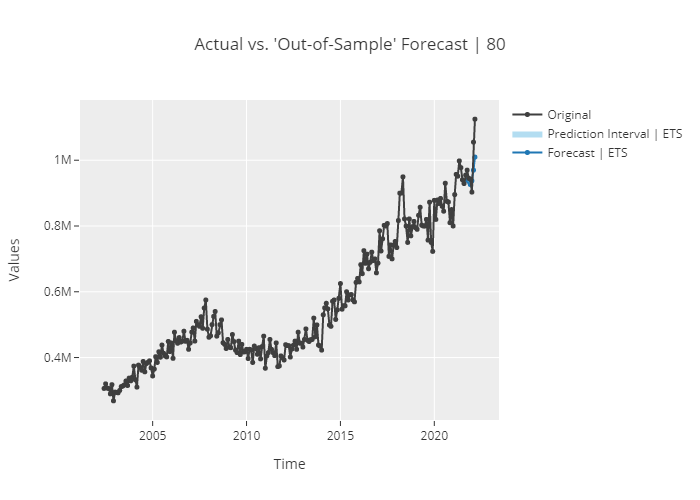

In [26]:
plot_model(best, plot = 'forecast')

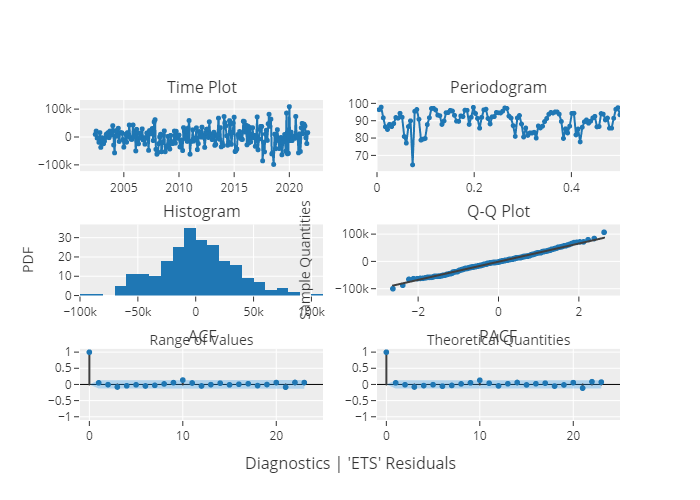

In [27]:
plot_model(best, plot = 'diagnostics')

In [28]:
final_best = finalize_model(best)
predict_model(best, fh = 6) ### output the predictions of the next 6 month's data for mon

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,ETS,48344.4662,61821.1239,0.0465,0.0480,0.9078,0.9325,0.3392


,y_pred
2021-10,9.406413e+05
2021-11,9.352966e+05
2021-12,9.262050e+05
2022-01,9.373601e+05
2022-02,9.699728e+05
2022-03,1.009678e+06
